# Time series forecasting with `Darts`

## The `TimeSeries` object

`TimeSeries` is the main abstraction provided by `Darts`. It is meant to be immutable.

`Darts` supports both univariate and multivariate `TimeSeries`.

Internally, the data is stored in a `pandas.DataFrame`, and many of the usual methods available on `DataFrame` are too on `TimeSeries`.

### Notebook setup (not relevant to darts in particular)

In [223]:
# fix python path if working locally
from utils import fix_pythonpath_if_working_locally
fix_pythonpath_if_working_locally()

%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Usual imports

In [224]:
import pandas as pd

from darts import TimeSeries

### Creating a `TimeSeries`

In [225]:
# from a DataFrame, itself created by reading a CSV file
df = pd.read_csv('AirPassengers.csv'
air_series = TimeSeries.from_dataframe(df, time_col='Month', value_cols=['#Passengers'])

# using TimeSeries generation functions
from darts.utils.timeseries_generation import constant_timeseries, linear_timeseries, sine_timeseries, random_walk_timeseries

const_series = constant_timeseries(length=50, value=5)
lin_series = linear_timeseries(length=50, start_value=0, end_value=10)
sine_series = sine_timeseries(length=50, value_frequency=0.05, value_amplitude=2, value_y_offset=5)
random_series = random_walk_timeseries(length=50, std=0.25)

### Printing and plotting

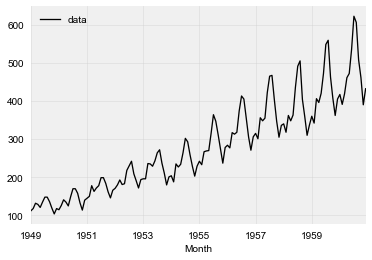

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]
Freq: MS


In [226]:
# plotting
import matplotlib.pyplot as plt

air_series.plot(label='data')

plt.legend()
plt.show()

# printing
print(air_series)

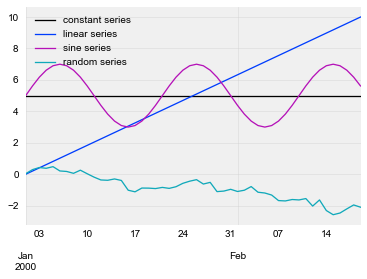

In [227]:
const_series.plot(label="constant series")
lin_series.plot(label="linear series")
sine_series.plot(label="sine series")
random_series.plot(label="random series")

plt.legend()
plt.show()

### Util methods on `TimeSeries`

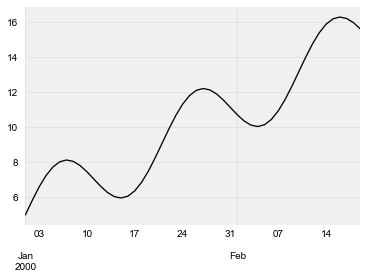

In [228]:
# Add two series together (elementwise)
combined_series = lin_series + sine_series
combined_series.plot()

plt.show()

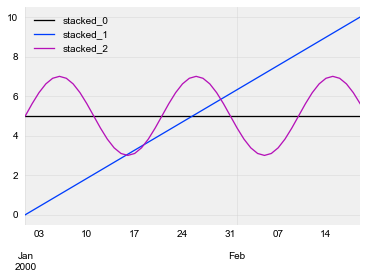

            0          1         2
2000-01-01  5   0.000000  5.000000
2000-01-02  5   0.204082  5.618034
2000-01-03  5   0.408163  6.175571
2000-01-04  5   0.612245  6.618034
2000-01-05  5   0.816327  6.902113
2000-01-06  5   1.020408  7.000000
2000-01-07  5   1.224490  6.902113
2000-01-08  5   1.428571  6.618034
2000-01-09  5   1.632653  6.175571
2000-01-10  5   1.836735  5.618034
2000-01-11  5   2.040816  5.000000
2000-01-12  5   2.244898  4.381966
2000-01-13  5   2.448980  3.824429
2000-01-14  5   2.653061  3.381966
2000-01-15  5   2.857143  3.097887
2000-01-16  5   3.061224  3.000000
2000-01-17  5   3.265306  3.097887
2000-01-18  5   3.469388  3.381966
2000-01-19  5   3.673469  3.824429
2000-01-20  5   3.877551  4.381966
2000-01-21  5   4.081633  5.000000
2000-01-22  5   4.285714  5.618034
2000-01-23  5   4.489796  6.175571
2000-01-24  5   4.693878  6.618034
2000-01-25  5   4.897959  6.902113
2000-01-26  5   5.102041  7.000000
2000-01-27  5   5.306122  6.902113
2000-01-28  5   5.51

In [229]:
# Create a multivariate TimeSeries from other TimeSeries
stacked_series = const_series.stack(lin_series).stack(sine_series)
stacked_series.plot(label="stacked")

plt.legend()
plt.show()

print(stacked_series)

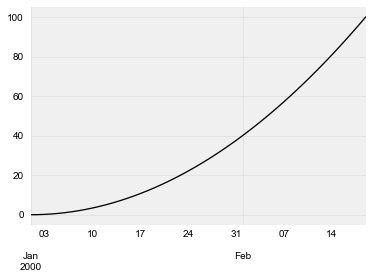

In [231]:
# Apply a function elementwise (map)
squared_series = lin_series.map(lambda x: x**2)
squared_series.plot()

### Indexing

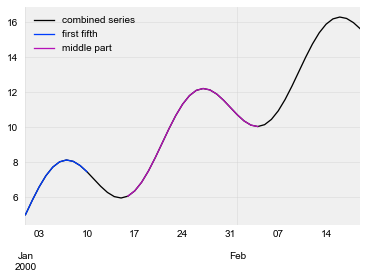

In [233]:
# Slice using indices
first_fifth = combined_series[:10]
middle_part = combined_series[15:35]

combined_series.plot(label="combined series")
first_fifth.plot(label="first fifth")
middle_part.plot(label="middle part")

plt.legend()
plt.show()

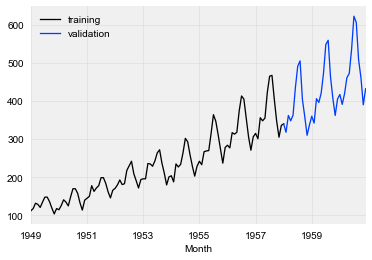

In [235]:
# Slice using pandas.Timestamp
air_series_train, air_series_val = air_series[:pd.Timestamp('1958-01-01')], air_series[pd.Timestamp('1958-01-02'):]
air_series_train.plot(label="training")
air_series_val.plot(label="validation")

plt.legend()
plt.show()

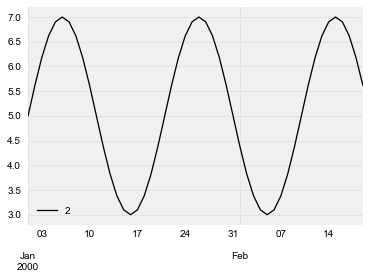

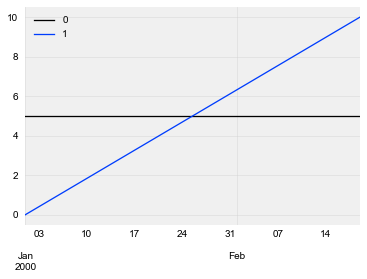

In [236]:
# get a subset of a multivariate TimeSeries
stacked_2 = stacked_series['2']
stacked_2.plot()

plt.legend()
plt.show()

stacked_01 = stacked_series[['0', '1']]
stacked_01.plot()

plt.legend()
plt.show()

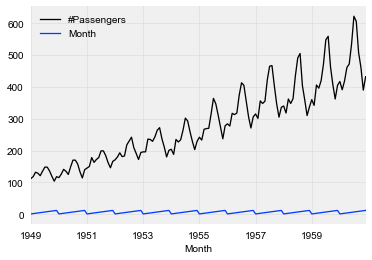

            #Passengers  Month
Month                         
1949-01-01          112      1
1949-02-01          118      2
1949-03-01          132      3
1949-04-01          129      4
1949-05-01          121      5
...                 ...    ...
1960-08-01          606      8
1960-09-01          508      9
1960-10-01          461     10
1960-11-01          390     11
1960-12-01          432     12

[144 rows x 2 columns]
Freq: MS


In [237]:
# Add a datetime attribute as additional component
with_month = air_series.add_datetime_attribute('month')

with_month.plot()
plt.legend()
plt.show()

print(air_series_with_month)

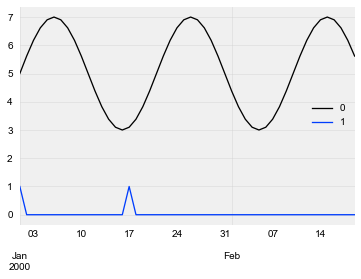

In [238]:
# Add holidays as additional component
with_holidays = sine_series.add_holidays('US')

with_holidays.plot()
plt.legend()
plt.show()

### Statistics

Is lin_series seasonal ? False


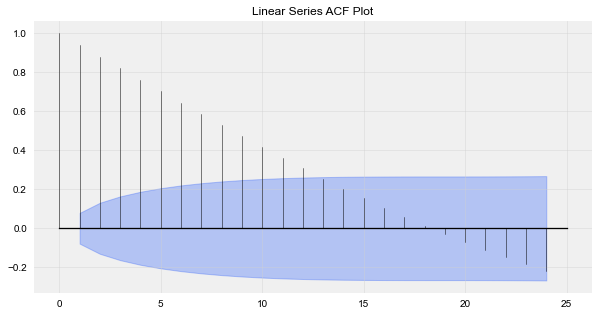

In [239]:
# Check for seasonality
from darts.utils.statistics import check_seasonality, plot_acf

is_seasonal, period = check_seasonality(lin_series)
print("Is lin_series seasonal ? {}".format(is_seasonal))

plot_acf(lin_series, title="Linear Series ACF Plot")

Is the AirPassenger series seasonal ? True, period 12


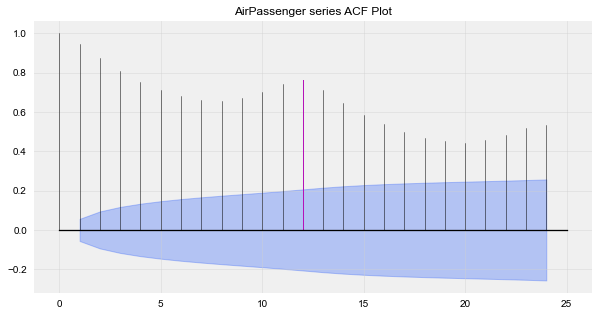

In [240]:
is_seasonal, period = check_seasonality(air_series)
print("Is the AirPassenger series seasonal ? {}, period {}".format(is_seasonal, period))

plot_acf(air_series, period, title="AirPassenger series ACF Plot")

## `ForecastingModel`

### General interface: `fit()` and `predict()`

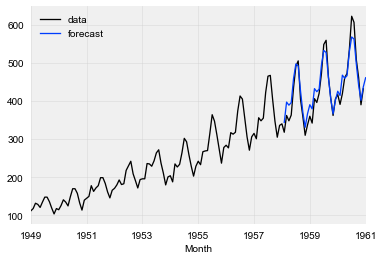

In [242]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(air_series_train)
forecast = model.predict(n=36)

air_series.plot(label="data")
forecast.plot(label="forecast")

plt.legend()
plt.show()

### Metrics

In [243]:
from darts.metrics import mape, smape, mase

print("Mean Absolute Percentage Error (MAPE): {:.3f}".format(mape(air_series_val, forecast)))
print("symmetric Mean Absolute Percentage Error (sMAPE): {:.3f}".format(smape(air_series_val, forecast)))
print("Mean Absolute Scaled Error (MASE): {:.3f}".format(mase(air_series_val, forecast, air_series_train)))

Mean Absolute Percentage Error (MAPE): 4.925
symmetric Mean Absolute Percentage Error (sMAPE): 4.809
Mean Absolute Scaled Error (MASE): 1.012


### Backtesting

`backtest()` allows to simulate how the model would have performed if it had been used historically to make predictions

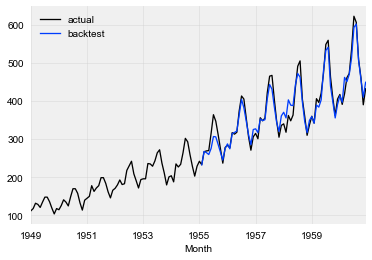

In [244]:
# Make a forecast of 3 months into the future every month, starting from half of the series
backtest = model.backtest(air_series, start=0.5, forecast_horizon=3, stride=1)

air_series.plot(label="actual")
backtest.plot(label="backtest")

plt.legend()
plt.show()

### Hyperparameters tuning

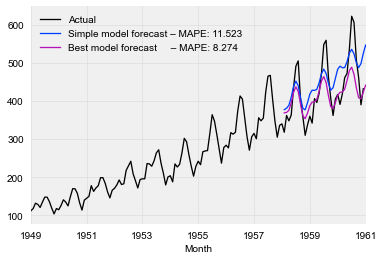

In [245]:
from darts.models import FFT
from darts.metrics import smape

params_dict = {
    'nr_freqs_to_keep': [5, 10, 15],
    'trend': ['poly', 'exp'],
    'trend_poly_degree': [1, 2, 3]
}

best_model = FFT.gridsearch(parameters=params_dict, training_series=air_series_train, val_target_series=air_series_val, metric=mape)
best_model.fit(air_series_train)
best_forecast = best_model.predict(36)
best_forecast_mape = mape(air_series_val, best_forecast)

simple_model = FFT(trend='poly')
simple_model.fit(air_series_train)
simple_forecast = simple_model.predict(36)
simple_forecast_mape = mape(air_series_val, simple_forecast)

air_series.plot(label="Actual")
simple_forecast.plot(label="Simple model forecast – MAPE: {:.3f}".format(simple_forecast_mape))
best_forecast.plot(label="Best model forecast     – MAPE: {:.3f}".format(best_forecast_mape))

plt.legend()
plt.show()

### Note: Multivariate Time Series

Neural-network-based forecasting models (`RNNModel`, `TCNModel` and `TransformerModel`) support training on multivariate time series too.

Their `fit()`, `backtest()` and `gridsearch()` methods allow specifying `target_series` in addition to `training_series`, to allow forecasting a possibly different time series than the one used for training.

In many multivariate forecasting problems, the components of `target_series` would however constitute a subset of the combponents of `training_series`, with for example one target variable and multiple dependent variables used for training.

We invite you to go over the `multivariate-examples.ipynb` notebook to see examples of such cases.

### `TorchForecastingModel` reproducibility

In [246]:
from darts.models import RNNModel

model1 = RNNModel(random_state=0)  # specifying a random_state to produce reproducible results
model2 = RNNModel(random_state=0)

model1.fit(combined_series)
forecast1 = model1.predict(10)

model2.fit(combined_series)
forecast2 = model2.predict(10)

print(forecast1 == forecast2)

True


In [247]:
#model1 = RNNModel()
#model1.fit(combined_series)
#forecast1 = model1.predict(10)

#model2 = model1.untrained_model()  # get a copy of the model in the exact state it was upon creation
#model2.fit(combined_series)
#forecast2 = model2.predict(10)

#print(forecast1 == forecast2)

## `RegressionModel`

### General interface: `fit()` and `predict()`

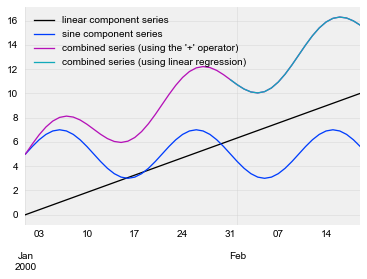

In [248]:
from darts.models import StandardRegressionModel


series_list = [lin_series, sine_series]
train, test = [series[:30] for series in series_list], [series[30:] for series in series_list]
train_target, test_target = combined_series[:30], combined_series[30:]

model = StandardRegressionModel()  # uses sklearn.linear_model.LinearRegression by default
model.fit(train_features=train, train_target=train_target)
pred = model.predict(test)

lin_series.plot(label="linear component series")
sine_series.plot(label="sine component series")
combined_series.plot(label="combined series (using the '+' operator)")
pred.plot(label="combined series (using linear regression)")

plt.legend()
plt.show()

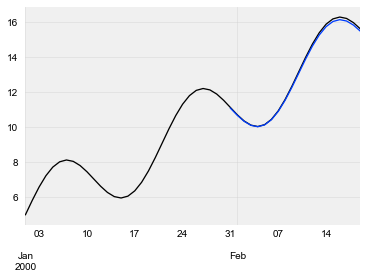

In [249]:
from sklearn.linear_model import SGDRegressor
model = StandardRegressionModel(model=SGDRegressor())  # Accepts any regression model with fit() and predict() method

model.fit(train, train_target)
pred = model.predict(test)

combined_series.plot(label="combined series (using the '+' operator)")
pred.plot(label="combined series (using SGDRegressor)")

### Backtesting*

* Actually, do we want to keep that now that we have `RegressionEnsembleModel` ?

## `EnsembleModel`
* A special kind of `ForecastingModel`

### `RegressionEnsembleModel`

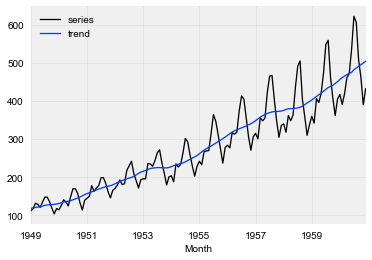

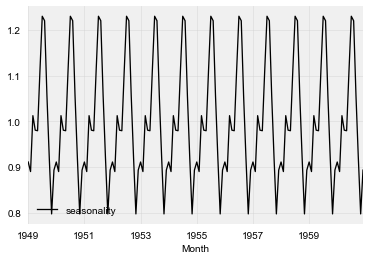

In [241]:
# Extract trend and seasonality components of a TimeSeries
from darts.utils.statistics import extract_trend_and_seasonality

trend, seasonality = extract_trend_and_seasonality(air_series)

air_series.plot(label="series")
trend.plot(label="trend")

plt.legend()
plt.show()

seasonality.plot(label="seasonality")
plt.legend()
plt.show()

## Data (pre) processing

### `DataTransformer` general interface: `transform()`

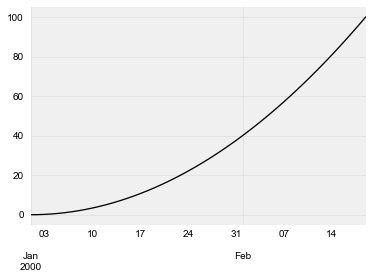

In [230]:
from darts.dataprocessing.transformers import Mapper

squarer = Mapper(lambda x: x**2)
squared = squarer.transform(lin_series)

squared.plot()
plt.show()

### Invertible transformers: `inverse_transform()`

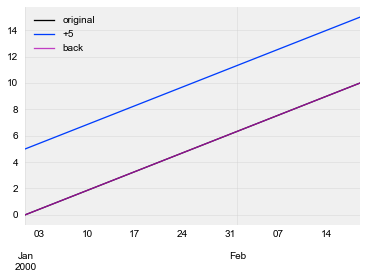

In [255]:
from darts.dataprocessing.transformers import InvertibleMapper

adder = InvertibleMapper(fn=lambda x: x + 5, inverse_fn=lambda y: y - 5)

plus_five = adder.transform(lin_series)
back = adder.inverse_transform(plus_five)

lin_series.plot(label="original")
plus_five.plot(label="+5")
back.plot(label="back")

plt.legend()
plt.show()

### Fittable transformers: `fit()` and `fit_transform()`

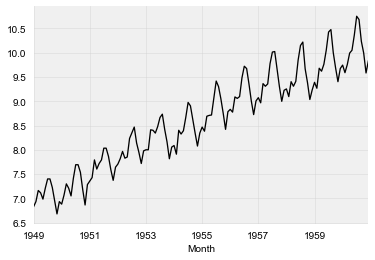

In [260]:
from darts.dataprocessing.transformers import BoxCox

boxcox = BoxCox()

boxcox.fit(air_series) # fit to find optimal value of BoxCox's lambda parameter
transformed = boxcox.transform(air_series)

transformed.plot()
plt.show()

In [259]:
# Equivalently: fit() and transform() with a single call
transformed = boxcox.fit_transform(air_series)

### `Pipeline`

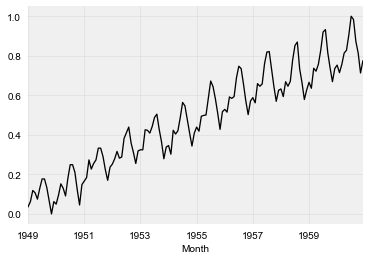

In [261]:
from darts.dataprocessing import Pipeline
from darts.dataprocessing.transformers import Scaler

pipeline = Pipeline([BoxCox(), Scaler()]) # Scaler uses sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1)) by default

transformed = pipeline.fit_transform(air_series)

transformed.plot()
plt.show()

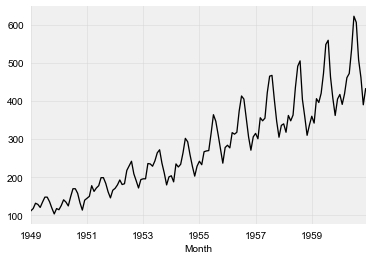

In [262]:
back = pipeline.inverse_transform(transformed)

back.plot()
plt.show()

See the `data-processing.ipynb` notebook for more detailed examples